In [98]:
x=(1,1,2,5,5,6,8,8,9,2.3,3.4)
y=(5,6,5,1,2,1,5,6,6,3.5,1.9)

In [99]:
X = np.array(list(zip(x, y)))

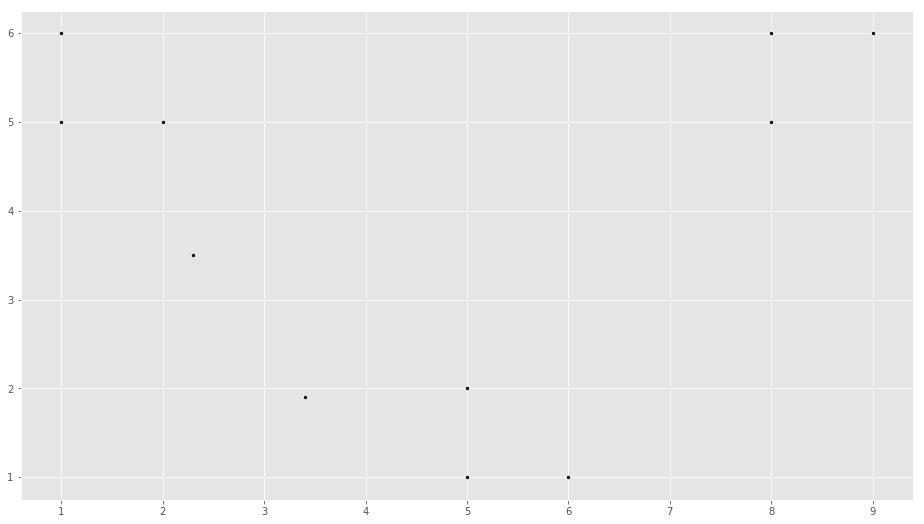

In [100]:
plt.scatter(x, y, c='black', s=8)

In [101]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [102]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[ 1.  3.]
 [ 8.  5.]
 [ 0.  4.]]


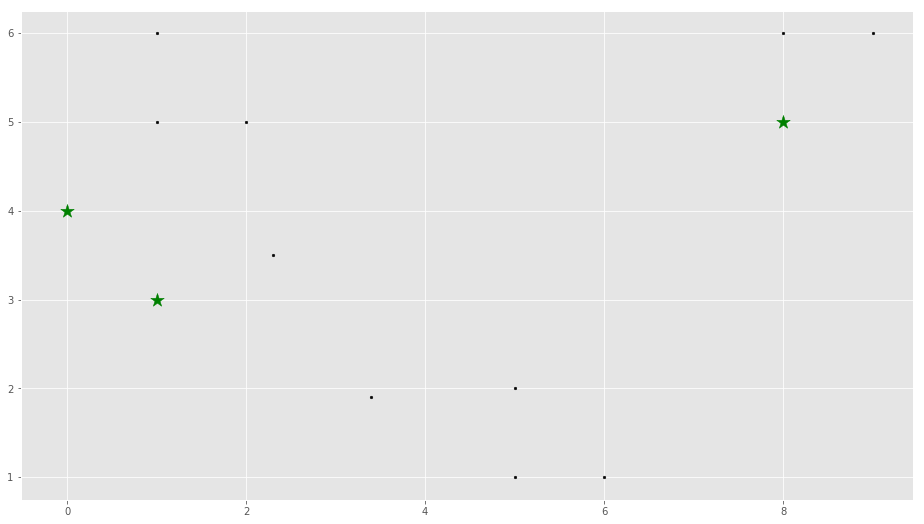

In [103]:
plt.scatter(x, y, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [104]:
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

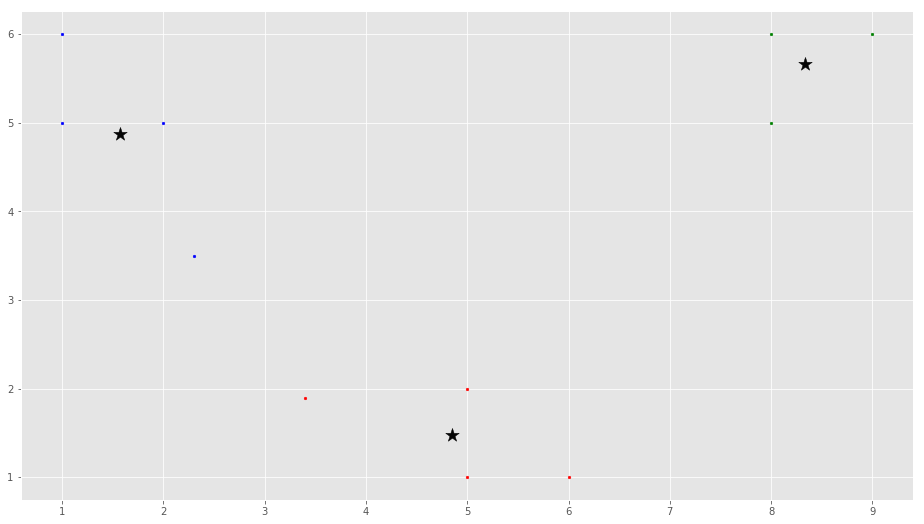

In [105]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')